In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import io
import requests
import statsmodels.api as sm
import mysql.connector as sql
db_connection = sql.connect(host='localhost', database='laraveladmin', user='root', password='')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT admit,toefl,greverbal,grequants,greawa,gradscore FROM testone WHERE course="Computer Science" and univ="Arizona State University"')

table_rows = db_cursor.fetchall()

datasets = pd.DataFrame(table_rows)
datasets.columns = ['admit','toefl', 'grev', 'greq', 'greawa', 'gradscore'] 
#print(dataset)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [17]:
# use pandas i/o to get the dataset
dataset = pd.read_csv("F:/python progs/ALGORITHMS TEST/example/admission.csv")


In [18]:
print(datasets.head())

   admit  toefl grev greq greawa gradscore
0      1    105  153  170     3.      71.5
1      1    100  152  164     3.      76.4
2      1    102  159  155      2      81.1
3      1    102  150  164      4     72.18
4      1    100  152  160     3.        73


In [19]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [20]:
print(dataset.shape)


(400, 8)


In [21]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
admit       400 non-null int64
toefl       400 non-null int64
rating      400 non-null int64
sop         400 non-null float64
lor         400 non-null float64
gpa         400 non-null float64
research    400 non-null int64
gre         400 non-null int64
dtypes: float64(3), int64(5)
memory usage: 25.1 KB
None


In [22]:
print(dataset.count())

admit       400
toefl       400
rating      400
sop         400
lor         400
gpa         400
research    400
gre         400
dtype: int64


In [23]:
print(dataset.columns)

Index(['admit', 'toefl', 'rating', 'sop', 'lor', 'gpa', 'research', 'gre'], dtype='object')


In [24]:
print(dataset.sum())

admit          180.00
toefl        42964.00
rating        1235.00
sop           1360.00
lor           1381.00
gpa           3439.57
research       219.00
gre         126723.00
dtype: float64


In [25]:
print(dataset.describe())

            admit       toefl      rating         sop         lor         gpa  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.450000  107.410000    3.087500    3.400000    3.452500    8.598925   
std      0.498117    6.069514    1.143728    1.006869    0.898478    0.596317   
min      0.000000   92.000000    1.000000    1.000000    1.000000    6.800000   
25%      0.000000  103.000000    2.000000    2.500000    3.000000    8.170000   
50%      0.000000  107.000000    3.000000    3.500000    3.500000    8.610000   
75%      1.000000  112.000000    4.000000    4.000000    4.000000    9.062500   
max      1.000000  120.000000    5.000000    5.000000    5.000000    9.920000   

         research         gre  
count  400.000000  400.000000  
mean     0.547500  316.807500  
std      0.498362   11.473646  
min      0.000000  290.000000  
25%      0.000000  308.000000  
50%      1.000000  317.000000  
75%      1.000000  325.000000  
max      1.000

In [26]:
print(dataset.count())


admit       400
toefl       400
rating      400
sop         400
lor         400
gpa         400
research    400
gre         400
dtype: int64


In [27]:
print(dataset.mean())


admit         0.450000
toefl       107.410000
rating        3.087500
sop           3.400000
lor           3.452500
gpa           8.598925
research      0.547500
gre         316.807500
dtype: float64


In [28]:
print(dataset.median())


admit         0.00
toefl       107.00
rating        3.00
sop           3.50
lor           3.50
gpa           8.61
research      1.00
gre         317.00
dtype: float64


In [29]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [30]:
dataArray = dataset.values


In [31]:
print(dataArray)

[[  1.   118.     4.   ...   9.65   1.   337.  ]
 [  1.   107.     4.   ...   8.87   1.   324.  ]
 [  0.   104.     3.   ...   8.     1.   316.  ]
 ...
 [  1.   116.     4.   ...   9.45   1.   330.  ]
 [  0.   103.     3.   ...   8.78   0.   312.  ]
 [  1.   117.     4.   ...   9.66   1.   333.  ]]


In [32]:
# split the input features and output variable
X = dataArray[:,1:8]
y = dataArray[:,0:1]
# split training and testing dataset
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [33]:
#splitting training & testing
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=validation_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(360, 7)
(40, 7)
(360, 1)
(40, 1)


In [34]:
num_trees = 200
max_features = 2
models = []
models.append(('LDA', LogisticRegression()))
models.append(('LR', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
LogisticRegression(solver='lbfgs')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
# fit the models and evaluate it
results = []
names = []
scoring = 'accuracy'

# evaluate each model using 10-FOLD cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    


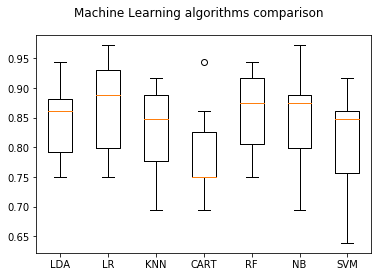

In [36]:
# boxplots for ML algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithms comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [37]:
# create the model
model = LogisticRegression()
# fit the model
model.fit(X_train, Y_train.ravel())

# make predictions on the test data
predictions = model.predict(X_test)

# compute the overall accuracy and display the classification report
print("Model --> Logistic Regression")
print("Overall Accuracy: {}".format(accuracy_score(Y_test, predictions) * 100))
print(classification_report(Y_test, predictions))
   

Model --> Logistic Regression
Overall Accuracy: 90.0
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        26
         1.0       0.86      0.86      0.86        14

   micro avg       0.90      0.90      0.90        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40



In [40]:
# make prediction on a new test data - (TOEFL, sop, lor, cv, gpa, research paper, GRE)
#new_data = [(105,2,2,2,8,1,330)]

new_data = [(105,5,5,5,7,1,280),(80,5,5,5,7.5,1,300),(105,4,4,4,7.8,0,300)]
# convert the list of tuples to numpy array
new_array = np.asarray(new_data)

# the output labels
labels = ["reject", "admit"]

# make prediction
prediction = model.predict_proba(new_array)[:,1]
predictionc = model.predict(new_array)

print(prediction)
# get the no.of.test cases used
no_of_test_cases, cols = new_array.shape
#df = pd.DataFrame(prediction, columns = ['ouput'])
#print(df)


[0.96477549 0.59583655 0.44993956]


In [41]:
# show the result
for i in range(no_of_test_cases):
    print("Status of STUDENT with toefl score= {}, SOP= {}, LOR = {}, CV={},gpa={}, international paper={}, gre={}, will be --> {}".format(new_data[i][0], new_data[i][1],new_data[i][2],new_data[i][3],new_data[i][4],new_data[i][5],new_data[i][6],prediction[i]*100))


Status of STUDENT with toefl score= 105, SOP= 5, LOR = 5, CV=5,gpa=7, international paper=1, gre=280, will be --> 96.4775485202647
Status of STUDENT with toefl score= 80, SOP= 5, LOR = 5, CV=5,gpa=7.5, international paper=1, gre=300, will be --> 59.58365455830009
Status of STUDENT with toefl score= 105, SOP= 4, LOR = 4, CV=4,gpa=7.8, international paper=0, gre=300, will be --> 44.99395581017114
